In [7]:
import pandas as pd
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import playerdashboardbyyearoveryear
from nba_api.stats.endpoints import commonteamroster
from nba_api.stats.endpoints import playergamelogs
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams
from nba_api.stats.static import players
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [8]:
career = playercareerstats.PlayerCareerStats(player_id="203076")
career.get_data_frames()[0]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203076,2012-13,00,1610612740,NOH,20.0,64,60,1846.0,349,...,0.751,165,357,522,63,75,112,89,158,867
1,203076,2013-14,00,1610612740,NOP,21.0,67,66,2358.0,522,...,0.791,207,466,673,105,89,189,109,200,1394
2,203076,2014-15,00,1610612740,NOP,22.0,68,68,2455.0,642,...,0.805,173,523,696,149,100,200,95,141,1656
3,203076,2015-16,00,1610612740,NOP,23.0,61,61,2164.0,560,...,0.758,130,497,627,116,78,125,121,148,1481
4,203076,2016-17,00,1610612740,NOP,24.0,75,75,2708.0,770,...,0.802,172,712,884,157,94,167,181,168,2099
5,203076,2017-18,00,1610612740,NOP,25.0,75,75,2727.0,780,...,0.828,187,644,831,174,115,193,162,159,2110
6,203076,2018-19,00,1610612740,NOP,26.0,56,56,1850.0,530,...,0.794,174,498,672,218,88,135,112,132,1452
7,203076,2019-20,00,1610612747,LAL,27.0,62,62,2131.0,551,...,0.846,142,435,577,200,91,143,154,156,1618
8,203076,2020-21,00,1610612747,LAL,28.0,36,36,1162.0,301,...,0.738,62,224,286,110,45,59,74,60,786
9,203076,2021-22,00,1610612747,LAL,29.0,40,40,1404.0,370,...,0.713,106,288,394,122,49,90,82,97,927


In [9]:
# get_teams returns a list of 30 dictionaries, each an NBA team.
nba_teams = teams.get_teams()
print("Number of teams fetched: {}".format(len(nba_teams)))
mavs = [team for team in nba_teams if team["full_name"] == "Dallas Mavericks"][0]
mavs

Number of teams fetched: 30


{'id': 1610612742,
 'full_name': 'Dallas Mavericks',
 'abbreviation': 'DAL',
 'nickname': 'Mavericks',
 'city': 'Dallas',
 'state': 'Texas',
 'year_founded': 1980}

In [10]:
nets = [team for team in nba_teams if team["full_name"] == "Brooklyn Nets"][0]
nets

{'id': 1610612751,
 'full_name': 'Brooklyn Nets',
 'abbreviation': 'BKN',
 'nickname': 'Nets',
 'city': 'Brooklyn',
 'state': 'New York',
 'year_founded': 1976}

In [11]:
roster = commonteamroster.CommonTeamRoster(season=2018, team_id=1610612737)
roster.get_data_frames()[0]

,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID,HOW_ACQUIRED
0,1610612737,2018,00,Justin Anderson,Justin,justin-anderson,1,G-F,6-6,230,"NOV 19, 1993",25.0,3,Virginia,1626147,None
1,1610612737,2018,00,Kevin Huerter,Kevin,kevin-huerter,3,G,6-7,190,"AUG 27, 1998",20.0,R,Maryland,1628989,None
2,1610612737,2018,00,Omari Spellman,Omari,omari-spellman,6,F,6-9,245,"JUL 21, 1997",21.0,R,Villanova,1629016,None
3,1610612737,2018,00,Isaac Humphries,Isaac,isaac-humphries,8,C,7-0,260,"JAN 05, 1998",21.0,R,Kentucky,1629353,None
4,1610612737,2018,00,Jaylen Adams,Jaylen,jaylen-adams,10,G,6-2,190,"MAY 04, 1996",23.0,R,St. Bonaventure,1629121,None
5,1610612737,2018,00,Trae Young,Trae,trae-young,11,G,6-2,180,"SEP 19, 1998",20.0,R,Oklahoma,1629027,Draft Rights Traded from DAL on 06/21/18
6,1610612737,2018,00,Taurean Prince,Taurean,taurean-prince,12,F,6-8,220,"MAR 22, 1994",25.0,2,Baylor,1627752,None
7,1610612737,2018,00,Dewayne Dedmon,Dewayne,dewayne-dedmon,14,C,7-0,245,"AUG 12, 1989",29.0,5,USC,203473,None
8,1610612737,2018,00,Vince Carter,Vince,vince-carter,15,F-G,6-6,220,"JAN 26, 1977",42.0,20,North Carolina,1713,None
9,1610612737,2018,00,Miles Plumlee,Miles,miles-plumlee,18,C,6-11,249,"SEP 01, 1988",30.0,6,Duke,203101,None


In [12]:
player_info = players.find_players_by_first_name("Kyrie")
player_info
#Luka is 1629029
#Kyrie is 202681

[{'id': 202681,
  'full_name': 'Kyrie Irving',
  'first_name': 'Kyrie',
  'last_name': 'Irving',
  'is_active': True}]

In [13]:
luka_career_stats = playercareerstats.PlayerCareerStats(player_id="1629029")
dict_response = luka_career_stats.get_normalized_dict()
player_career_regular_season_totals = dict_response['CareerTotalsRegularSeason']
player_career_regular_season_totals

[{'PLAYER_ID': 1629029,
  'LEAGUE_ID': '00',
  'Team_ID': 0,
  'GP': 400,
  'GS': 400,
  'MIN': 13943.0,
  'FGM': 3898,
  'FGA': 8296,
  'FG_PCT': 0.469864,
  'FG3M': 1201,
  'FG3A': 3457,
  'FG3_PCT': 0.347411,
  'FTM': 2473,
  'FTA': 3309,
  'FT_PCT': 0.747355,
  'OREB': 387,
  'DREB': 3085,
  'REB': 3472,
  'AST': 3317,
  'STL': 467,
  'BLK': 182,
  'TOV': 1598,
  'PF': 902,
  'PTS': 11470}]

In [14]:
kyrie_career_stats = playercareerstats.PlayerCareerStats(player_id="202681")
dict_response = kyrie_career_stats.get_normalized_dict()
player_career_regular_season_totals = dict_response['CareerTotalsRegularSeason']
player_career_regular_season_totals

[{'PLAYER_ID': 202681,
  'LEAGUE_ID': '00',
  'Team_ID': 0,
  'GP': 729,
  'GS': 729,
  'MIN': 25075.0,
  'FGM': 6340,
  'FGA': 13368,
  'FG_PCT': 0.474266,
  'FG3M': 1732,
  'FG3A': 4404,
  'FG3_PCT': 0.393278,
  'FTM': 2787,
  'FTA': 3146,
  'FT_PCT': 0.885886,
  'OREB': 578,
  'DREB': 2355,
  'REB': 2933,
  'AST': 4134,
  'STL': 956,
  'BLK': 314,
  'TOV': 1831,
  'PF': 1669,
  'PTS': 17199}]

In [15]:
kyrie_game_log = playergamelogs.PlayerGameLogs(player_id_nullable="202681", team_id_nullable= "1610612751", season_nullable="2022-23", season_type_nullable="Regular Season")
kyrie_bkn_22 = pd.DataFrame(data=kyrie_game_log.get_data_frames()[0])

In [16]:
kyrie_game_log = playergamelogs.PlayerGameLogs(player_id_nullable="202681", season_nullable="2021-22", season_type_nullable="Regular Season")
kyrie_bkn_21 = pd.DataFrame(data=kyrie_game_log.get_data_frames()[0])

In [17]:
print(type(kyrie_bkn_22))
print(type(kyrie_bkn_21))
kyrie_nets = pd.concat([kyrie_bkn_21, kyrie_bkn_22])

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
kyrie_game_log = playergamelogs.PlayerGameLogs(player_id_nullable="202681", season_nullable="2022-23", team_id_nullable="1610612742", season_type_nullable="Regular Season")
kyrie_mavs_22 = pd.DataFrame(data=kyrie_game_log.get_data_frames()[0])

In [19]:
kyrie_game_log = playergamelogs.PlayerGameLogs(player_id_nullable="202681", season_nullable="2023-24", season_type_nullable="Regular Season")
kyrie_mavs_23 = pd.DataFrame(data=kyrie_game_log.get_data_frames()[0])

In [20]:
print(type(kyrie_mavs_22))
print(type(kyrie_mavs_23))
kyrie_mavs = pd.concat([kyrie_mavs_22, kyrie_mavs_23])
kyrie_mavs

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG
0,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201195,2023-04-05T00:00:00,DAL vs. SAC,...,1,8,16,6,6,7,3,1,6,1
1,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201167,2023-04-02T00:00:00,DAL @ ATL,...,7,8,6,1,16,1,3,1,2,1
2,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201161,2023-04-01T00:00:00,DAL @ MIA,...,1,8,16,13,11,17,3,1,17,1
3,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201139,2023-03-29T00:00:00,DAL @ PHI,...,7,2,9,13,14,11,3,1,11,1
4,2022-23,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022201123,2023-03-27T00:00:00,DAL @ IND,...,7,3,16,19,2,10,3,1,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022300147,2023-11-06T00:00:00,DAL @ ORL,...,1,24,21,45,10,17,1,1,19,1
54,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022300143,2023-11-05T00:00:00,DAL vs. CHA,...,1,39,21,48,25,32,1,1,42,1
55,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022300006,2023-11-03T00:00:00,DAL @ DEN,...,1,6,21,42,51,20,6,1,25,1
56,2023-24,202681,Kyrie Irving,Kyrie,1610612742,DAL,Dallas Mavericks,0022300084,2023-10-27T00:00:00,DAL vs. BKN,...,1,24,21,50,42,45,6,1,49,1


In [21]:
kyrie_mavs.columns

Index(['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2',
       'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK',
       'WNBA_FANTASY_PTS_RANK', 'AVAILABLE_FLAG'],
      dtype='object')

In [22]:
kyrie_mavs['Team'] = 'Mavs'
kyrie_nets['Team'] = 'Nets'
combined_data = pd.concat([kyrie_mavs, kyrie_nets])
combined_data['FG_PCT_m'] = combined_data['FG_PCT'] * 100
combined_data['FG3_PCT_m'] = combined_data['FG3_PCT'] * 100
kyrie_mavs['FG_PCT_m'] = kyrie_mavs['FG_PCT'] * 100
kyrie_mavs['FG3_PCT_m'] = kyrie_mavs['FG3_PCT'] * 100
kyrie_nets['FG_PCT_m'] = kyrie_nets['FG_PCT'] * 100
kyrie_nets['FG3_PCT_m'] = kyrie_nets['FG3_PCT'] * 100


In [23]:
average_mavs_pts = kyrie_mavs['PTS'].mean()
average_nets_pts = kyrie_nets['PTS'].mean()

print(f"Average points for Kyrie with Mavs: {average_mavs_pts}")
print(f"Average points for Kyrie with Nets: {average_nets_pts}")

Average points for Kyrie with Mavs: 25.974358974358974
Average points for Kyrie with Nets: 27.246376811594203


In [24]:
def boxplot_metrics(ax, metric, description):
    sns.boxplot(x='Team', y=metric, data=combined_data, ax=ax)

    # Calculate medians and outliers
    mavs_median = kyrie_mavs[metric].median()
    nets_median = kyrie_nets[metric].median()
    mavs_outliers = kyrie_mavs[(kyrie_mavs[metric] > kyrie_mavs[metric].quantile(0.75) + 1.5 * (kyrie_mavs[metric].quantile(0.75) - kyrie_mavs[metric].quantile(0.25))) |
                               (kyrie_mavs[metric] < kyrie_mavs[metric].quantile(0.25) - 1.5 * (kyrie_mavs[metric].quantile(0.75) - kyrie_mavs[metric].quantile(0.25)))]
    nets_outliers = kyrie_nets[(kyrie_nets[metric] > kyrie_nets[metric].quantile(0.75) + 1.5 * (kyrie_nets[metric].quantile(0.75) - kyrie_nets[metric].quantile(0.25))) |
                               (kyrie_nets[metric] < kyrie_nets[metric].quantile(0.25) - 1.5 * (kyrie_nets[metric].quantile(0.75) - kyrie_nets[metric].quantile(0.25)))]

    # Annotate the medians
    ax.annotate(f'Median: {mavs_median:.1f}', xy=(0, mavs_median), xytext=(0.25, mavs_median),
                textcoords='offset points', ha='center', va='center')
    ax.annotate(f'Median: {nets_median:.1f}', xy=(1, nets_median), xytext=(0.25, nets_median),
                textcoords='offset points', ha='center', va='center')

    # # Annotate the outliers
    for outlier in mavs_outliers[metric]:
        ax.annotate(f'{outlier:.1f}', xy=(0, outlier), xytext=(5, 0),
                    textcoords='offset points', ha='left', va='center')
    for outlier in nets_outliers[metric]:
        ax.annotate(f'{outlier:.1f}', xy=(1, outlier), xytext=(5, 0),
                    textcoords='offset points', ha='left', va='center')

    ax.set_ylabel(description)
    ax.set_title(f'Comparison of Kyrie\'s {description} for Mavs and Nets')


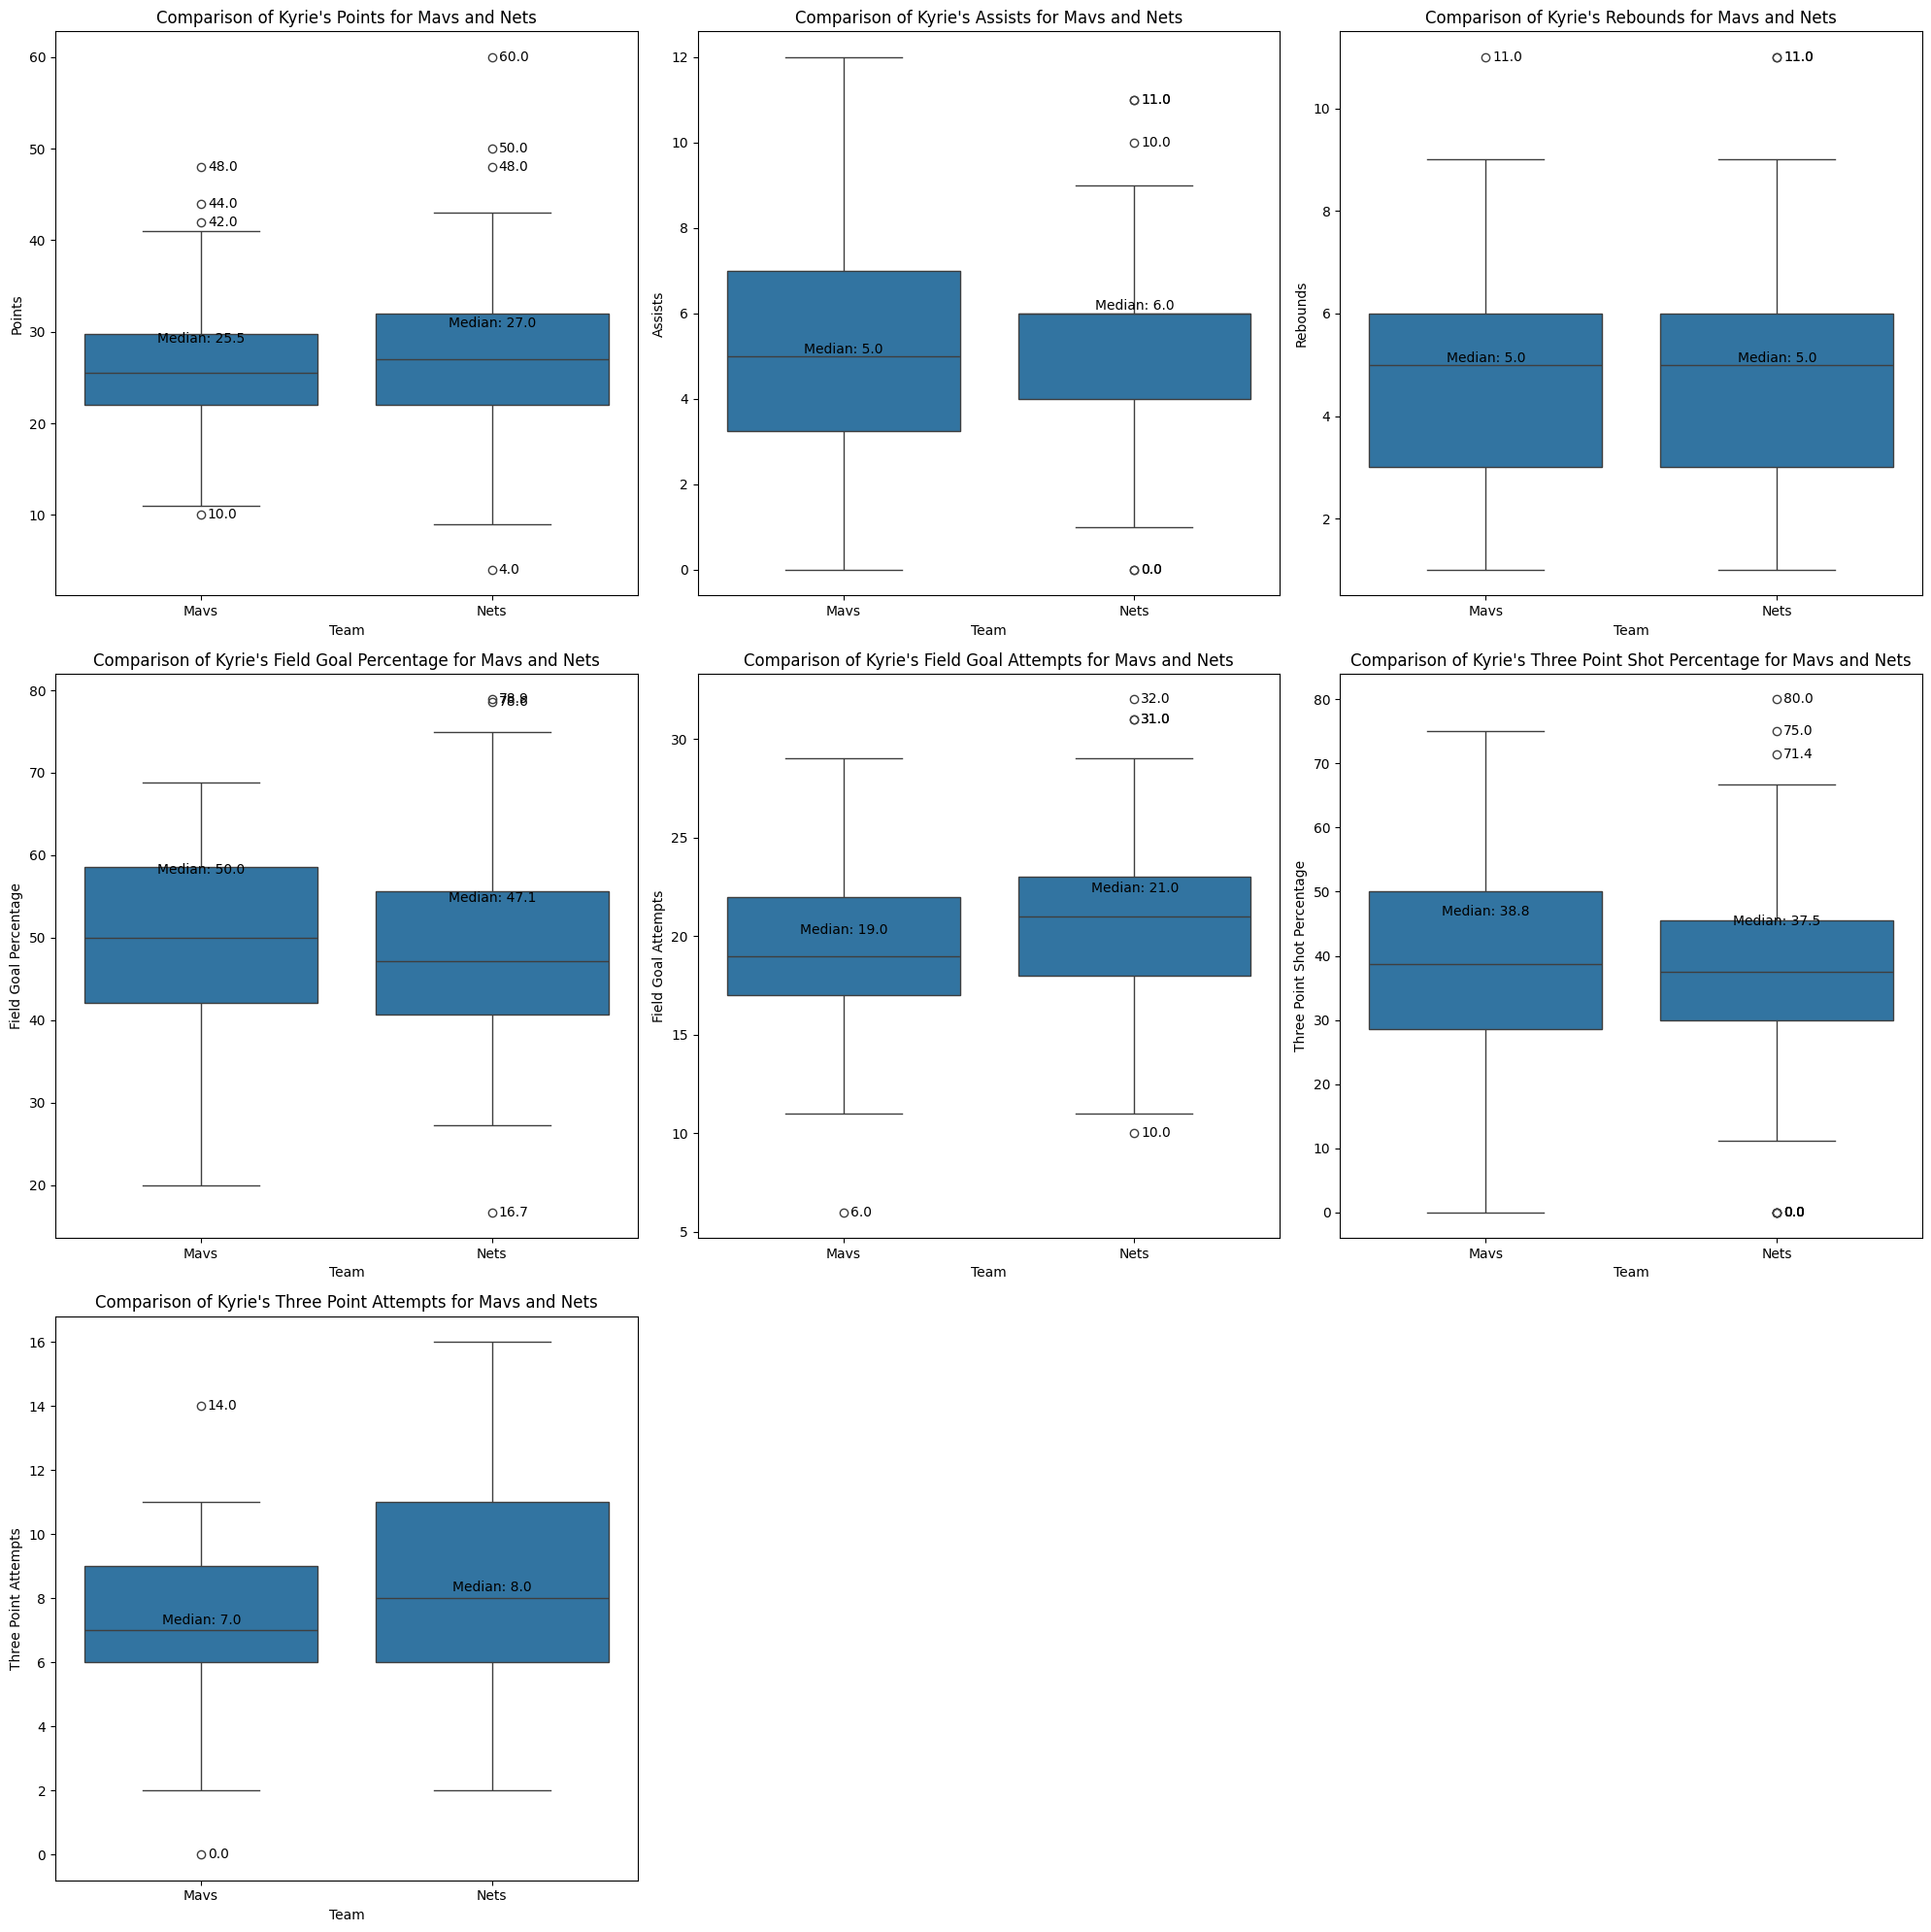

In [25]:
metric_list = [['PTS', "Points"], ['AST', "Assists"], ['REB', "Rebounds"], 
               ['FG_PCT_m', "Field Goal Percentage"], ['FGA', "Field Goal Attempts"], 
               ['FG3_PCT_m', "Three Point Shot Percentage"], ['FG3A', 'Three Point Attempts']]

# Determine the grid layout
n_metrics = len(metric_list)
n_cols = 3  # Change to 4 if you prefer a 2x4 layout
n_rows = (n_metrics + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each metric in its subplot
for ax, (metric, description) in zip(axes, metric_list):
    boxplot_metrics(ax, metric, description)

# Remove any empty subplots
for ax in axes[len(metric_list):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

# How were the Mavericks affected by this trade?

In [26]:
# Query for games where the Celtics were playing
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable="1610612742", season_type_nullable="Regular Season")
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612742,DAL,Dallas Mavericks,0022301196,2024-04-14,DAL @ OKC,L,241,86,...,0.824,12,29,41,19,8,2,14,15,-49.0
1,22023,1610612742,DAL,Dallas Mavericks,0022301181,2024-04-12,DAL vs. DET,L,242,89,...,0.750,9,40,49,20,5,5,20,9,-18.0
2,22023,1610612742,DAL,Dallas Mavericks,0022301161,2024-04-10,DAL @ MIA,W,241,111,...,0.769,8,31,39,27,8,8,7,13,19.0
3,22023,1610612742,DAL,Dallas Mavericks,0022301144,2024-04-09,DAL @ CHA,W,240,130,...,0.650,16,39,55,35,6,7,14,19,26.0
4,22023,1610612742,DAL,Dallas Mavericks,0022301131,2024-04-07,DAL vs. HOU,W,264,147,...,0.889,6,41,47,21,4,6,17,26,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,21983,1610612742,DAL,Dallas Mavericks,0028300047,1983-11-04,DAL @ CLE,L,240,84,...,0.714,13,26,39,15,5,6,15,21,NaN
3383,21983,1610612742,DAL,Dallas Mavericks,0028300032,1983-11-02,DAL vs. POR,W,240,123,...,0.778,17,34,51,34,9,8,17,24,NaN
3384,21983,1610612742,DAL,Dallas Mavericks,0028300026,1983-11-01,DAL @ DEN,W,240,130,...,0.732,11,31,42,27,13,8,13,25,NaN
3385,21983,1610612742,DAL,Dallas Mavericks,0028300020,1983-10-30,DAL @ SAN,L,240,101,...,0.652,13,23,36,30,10,7,20,27,NaN


In [27]:
games.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [28]:
games_with_kyrie = pd.merge(kyrie_mavs['GAME_ID'], games, on='GAME_ID', how='inner')
# Count the number of wins and losses
win_count = kyrie_mavs[kyrie_mavs['WL'] == 'W'].shape[0]
loss_count = kyrie_mavs[kyrie_mavs['WL'] == 'L'].shape[0]
print(f"Mavs' record when Kyrie is playing: {win_count} Wins, {loss_count} Losses")

Mavs' record when Kyrie is playing: 47 Wins, 31 Losses


In [29]:
games_21_23 = games[games['SEASON_ID'].str[-4:].isin(['2021', '2022', '2023'])]
kyrie_mavs_game_ids = kyrie_mavs['GAME_ID']
# Filter games_21_23 based on GAME_IDs not present in kyrie_mavs
games_without_kyrie = games_21_23[~games_21_23['GAME_ID'].isin(kyrie_mavs_game_ids)]
games_without_kyrie
mavs_record_without_kyrie = games_without_kyrie['WL'].value_counts()
mavs_record_without_kyrie

WL
W    98
L    85
Name: count, dtype: int64

In [30]:
print(47/31)
print(98/85)

1.5161290322580645
1.1529411764705881


In [31]:
games_with_kyrie

,GAME_ID,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,0022201195,22022,1610612742,DAL,Dallas Mavericks,2023-04-05,DAL vs. SAC,W,242,123,...,0.833,7,32,39,24,4,7,10,18,4.0
1,0022201167,22022,1610612742,DAL,Dallas Mavericks,2023-04-02,DAL @ ATL,L,266,130,...,0.688,10,37,47,24,4,3,14,15,-2.0
2,0022201161,22022,1610612742,DAL,Dallas Mavericks,2023-04-01,DAL @ MIA,L,241,122,...,0.875,1,30,31,32,3,2,14,23,-7.0
3,0022201139,22022,1610612742,DAL,Dallas Mavericks,2023-03-29,DAL @ PHI,L,239,108,...,0.778,8,32,40,24,3,3,14,22,-8.0
4,0022201123,22022,1610612742,DAL,Dallas Mavericks,2023-03-27,DAL @ IND,W,241,127,...,0.882,4,29,33,29,7,8,13,23,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0022300147,22023,1610612742,DAL,Dallas Mavericks,2023-11-06,DAL @ ORL,W,239,117,...,0.714,5,26,31,21,9,6,14,20,15.0
74,0022300143,22023,1610612742,DAL,Dallas Mavericks,2023-11-05,DAL vs. CHA,W,239,124,...,0.750,9,38,47,31,3,6,10,19,6.0
75,0022300006,22023,1610612742,DAL,Dallas Mavericks,2023-11-03,DAL @ DEN,L,240,114,...,0.882,10,24,34,27,12,6,15,19,-11.0
76,0022300084,22023,1610612742,DAL,Dallas Mavericks,2023-10-27,DAL vs. BKN,W,240,125,...,0.786,8,32,40,20,5,2,9,15,5.0


In [32]:
games_without_kyrie

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612742,DAL,Dallas Mavericks,0022301196,2024-04-14,DAL @ OKC,L,241,86,...,0.824,12,29,41,19,8,2,14,15,-49.0
1,22023,1610612742,DAL,Dallas Mavericks,0022301181,2024-04-12,DAL vs. DET,L,242,89,...,0.750,9,40,49,20,5,5,20,9,-18.0
33,22023,1610612742,DAL,Dallas Mavericks,0022300702,2024-02-03,DAL vs. MIL,L,240,117,...,0.913,8,34,42,22,9,1,21,19,-12.0
34,22023,1610612742,DAL,Dallas Mavericks,0022300680,2024-01-31,DAL @ MIN,L,239,87,...,0.731,9,22,31,18,4,4,16,24,-34.0
35,22023,1610612742,DAL,Dallas Mavericks,0022300666,2024-01-29,DAL vs. ORL,W,241,131,...,0.744,3,32,35,27,6,2,15,24,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,22021,1610612742,DAL,Dallas Mavericks,1522100069,2021-08-17,DAL @ MIA,W,200,83,...,0.952,8,19,27,15,6,5,6,18,8.8
257,22021,1610612742,DAL,Dallas Mavericks,1522100053,2021-08-15,DAL @ SAC,L,200,70,...,0.706,11,30,41,10,5,4,17,21,-16.0
258,22021,1610612742,DAL,Dallas Mavericks,1522100045,2021-08-14,DAL vs. DEN,L,210,85,...,0.560,7,24,31,21,14,5,13,19,0.0
259,22021,1610612742,DAL,Dallas Mavericks,1522100028,2021-08-11,DAL vs. UTA,L,221,80,...,0.706,12,30,42,16,8,3,10,25,0.0


In [33]:
games_with_kyrie['Kyrie'] = 'Kyrie'
games_without_kyrie['Kyrie'] = 'No Kyrie'
kyrie_games_combined = pd.concat([games_with_kyrie, games_without_kyrie])
kyrie_games_combined['FG_PCT_m'] = kyrie_games_combined['FG_PCT'] * 100
kyrie_games_combined['FG3_PCT_m'] = kyrie_games_combined['FG3_PCT'] * 100
games_with_kyrie['FG_PCT_m'] = games_with_kyrie['FG_PCT'] * 100
games_with_kyrie['FG3_PCT_m'] = games_with_kyrie['FG3_PCT'] * 100
games_without_kyrie['FG_PCT_m'] = games_without_kyrie['FG_PCT'] * 100
games_without_kyrie['FG3_PCT_m'] = games_without_kyrie['FG3_PCT'] * 100

/var/folders/k5/j7sv5qjx7s391_wt_5zkp6cc0000gn/T/ipykernel_84163/1812686813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_without_kyrie['Kyrie'] = 'No Kyrie'
/var/folders/k5/j7sv5qjx7s391_wt_5zkp6cc0000gn/T/ipykernel_84163/1812686813.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_without_kyrie['FG_PCT_m'] = games_without_kyrie['FG_PCT'] * 100
/var/folders/k5/j7sv5qjx7s391_wt_5zkp6cc0000gn/T/ipykernel_84163/1812686813.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [34]:
def team_metrics(ax, metric, description):
    sns.boxplot(x='Kyrie', y=metric, data=kyrie_games_combined, ax=ax)

    # Calculate medians and outliers
    kyrie_games_median = games_with_kyrie[metric].median()
    no_kyrie_games_median = games_without_kyrie[metric].median()
    kyrie_games_outliers = games_with_kyrie[(games_with_kyrie[metric] > games_with_kyrie[metric].quantile(0.75) + 1.5 * (games_with_kyrie[metric].quantile(0.75) - games_with_kyrie[metric].quantile(0.25))) |
                               (games_with_kyrie[metric] < games_with_kyrie[metric].quantile(0.25) - 1.5 * (games_with_kyrie[metric].quantile(0.75) - games_with_kyrie[metric].quantile(0.25)))]
    no_kyrie_games_outliers = games_without_kyrie[(games_without_kyrie[metric] > games_without_kyrie[metric].quantile(0.75) + 1.5 * (games_without_kyrie[metric].quantile(0.75) - games_without_kyrie[metric].quantile(0.25))) |
                               (games_without_kyrie[metric] < games_without_kyrie[metric].quantile(0.25) - 1.5 * (games_without_kyrie[metric].quantile(0.75) - games_without_kyrie[metric].quantile(0.25)))]

    # Annotate the medians
    ax.annotate(f'Median: {kyrie_games_median:.1f}', xy=(0, kyrie_games_median), xytext=(0.25, kyrie_games_median),
                textcoords='offset points', ha='center', va='center')
    ax.annotate(f'Median: {no_kyrie_games_median:.1f}', xy=(1, no_kyrie_games_median), xytext=(0.25, no_kyrie_games_median),
                textcoords='offset points', ha='center', va='center')

    # # Annotate the outliers
    for outlier in kyrie_games_outliers[metric]:
        ax.annotate(f'{outlier:.1f}', xy=(0, outlier), xytext=(5, 0),
                    textcoords='offset points', ha='left', va='center')
    for outlier in no_kyrie_games_outliers[metric]:
        ax.annotate(f'{outlier:.1f}', xy=(1, outlier), xytext=(5, 0),
                    textcoords='offset points', ha='left', va='center')

    ax.set_ylabel(description)
    ax.set_title(f'How does Kyrie affect the Mavs {description}')

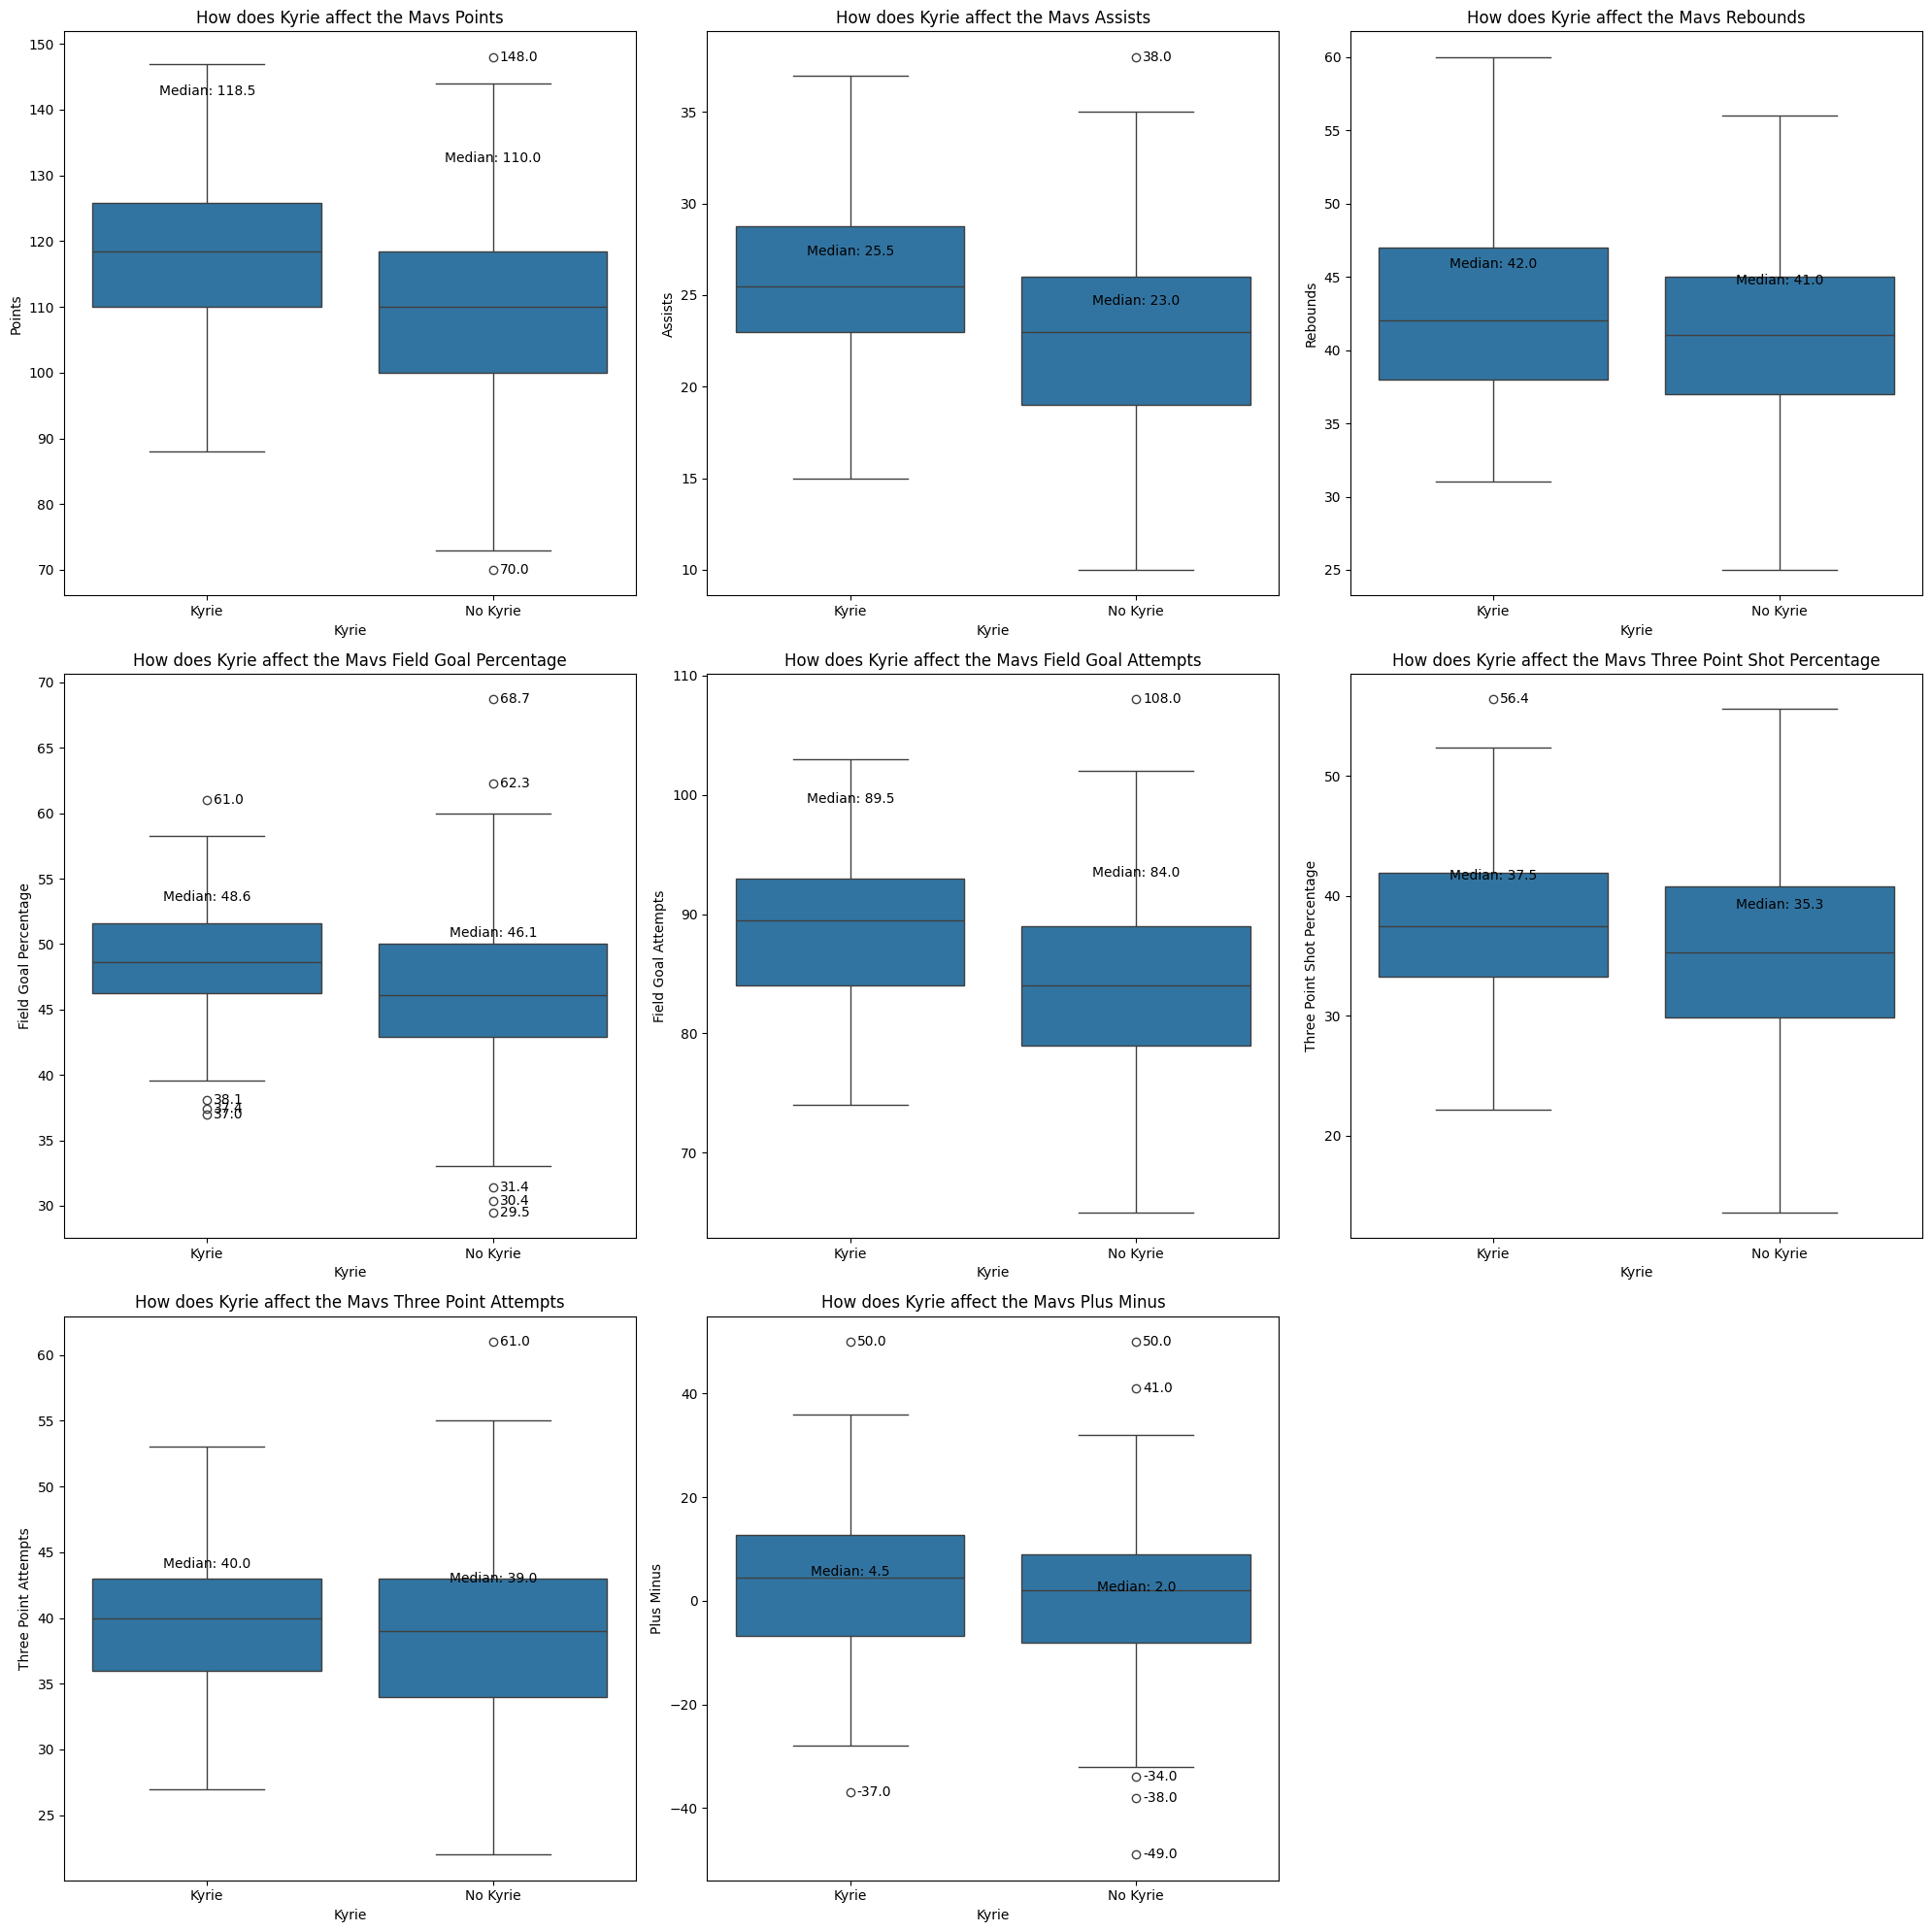

In [35]:
metric_list = [['PTS', "Points"], ['AST', "Assists"], ['REB', "Rebounds"], 
               ['FG_PCT_m', "Field Goal Percentage"], ['FGA', "Field Goal Attempts"], 
               ['FG3_PCT_m', "Three Point Shot Percentage"], ['FG3A', 'Three Point Attempts'], ['PLUS_MINUS', 'Plus Minus']]

# Determine the grid layout
n_metrics = len(metric_list)
n_cols = 3  # Change to 4 if you prefer a 2x4 layout
n_rows = (n_metrics + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each metric in its subplot
for ax, (metric, description) in zip(axes, metric_list):
    team_metrics(ax, metric, description)

# Remove any empty subplots
for ax in axes[len(metric_list):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [52]:
kyrie_mavs = kyrie_mavs.reset_index(drop=True)


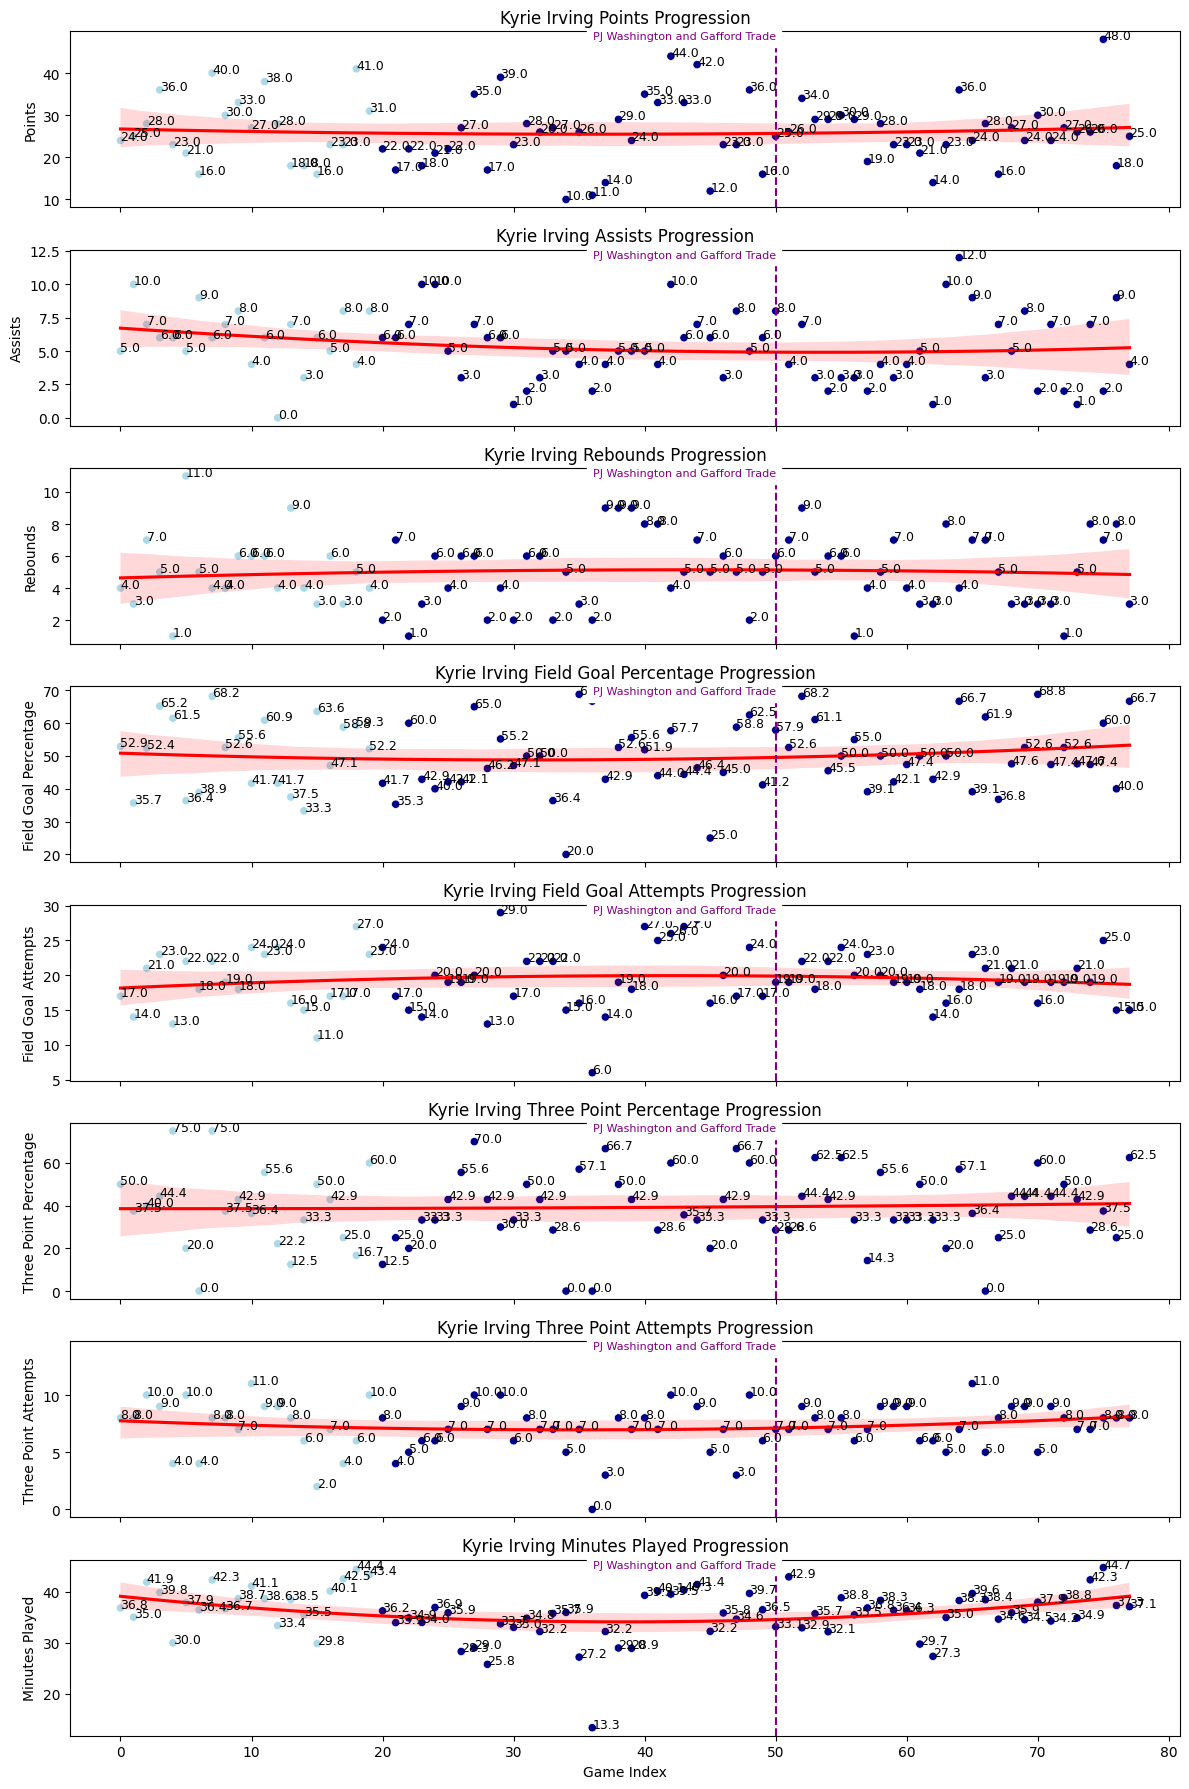

In [69]:
metrics = ['PTS', 'AST', 'REB', 'FG_PCT_m', 'FGA', 'FG3_PCT_m', 'FG3A', 'MIN']
metric_labels = ['Points', 'Assists', 'Rebounds', 'Field Goal Percentage', 'Field Goal Attempts', 'Three Point Percentage', 'Three Point Attempts', 'Minutes Played']

# Create a figure and axes for subplots
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 18), sharex=True)

kyrie_mavs['Color'] = kyrie_mavs['SEASON_YEAR'].apply(lambda x: 'darkblue' if x == '2023-24' else 'lightblue')

# Create dot plots for each metric with lines of best fit
for i, (ax, metric, label) in enumerate(zip(axes, metrics, metric_labels)):
    sns.scatterplot(x=kyrie_mavs.index, y=metric, hue='Color', palette=['lightblue', 'darkblue'], data=kyrie_mavs, ax=ax, legend=False)
    sns.regplot(x=kyrie_mavs.index, y=metric, data=kyrie_mavs, order=2, scatter=False, ax=ax, line_kws={'color': 'red'})
    ax.set_title(f'Kyrie Irving {label} Progression')
    ax.set_xlabel('Game Index')
    ax.set_ylabel(label)
    # Annotate the data points
    for j, row in kyrie_mavs.iterrows():
        ax.text(j, row[metric], f'{row[metric]:.1f}', fontsize=9)
    
    ax.axvline(x=50, color='purple', linestyle='--')
    ax.text(50, ax.get_ylim()[1], 'PJ Washington and Gafford Trade', color='purple', fontsize=8, ha='right', va='top', rotation=0, backgroundcolor='white')

# Adjust layout
plt.tight_layout()
plt.show()

In [67]:
kyrie_mavs['MIN']

0     36.805000
1     35.000000
2     41.871667
3     39.833333
4     29.966667
        ...    
73    34.861667
74    42.316667
75    44.711667
76    37.300000
77    37.066667
Name: MIN, Length: 78, dtype: float64